In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('/Users/seungwooseo/Library/Mobile Documents/com~apple~CloudDocs/00. Github/public_portfolio_data_visualisation/public_portfolio_online_retail/data.csv', encoding='latin1')

In [49]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [51]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Ploty

In [52]:
import plotly.express as px
import plotly.graph_objects as go
import panel as pn

In [53]:
df_uk = df[df['Country']=="United Kingdom"]

In [54]:
import datetime
# Change the type of "Invoice Date" from String to Datetime
df_uk["InvoiceDate"] = pd.to_datetime(df_uk["InvoiceDate"], format="%m/%d/%Y %H:%M")
df_uk['InvoiceDate'][0] #Check out

/var/folders/qm/p39lnhx103n3x9q5d1n6hhv00000gn/T/ipykernel_3222/3824630120.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Timestamp('2010-12-01 08:26:00')

In [55]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [56]:
df_uk["TotalSale"] = df_uk["UnitPrice"]*df_uk["Quantity"]

/var/folders/qm/p39lnhx103n3x9q5d1n6hhv00000gn/T/ipykernel_3222/1091268491.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [58]:
df_uk[df_uk["CustomerID"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32


### Remove the rows of which customer ID is null

In [59]:
df_uk = df_uk[df_uk["CustomerID"].notnull()] #Filter the rows where CustomerID is not null
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [60]:
df_uk["DateOnly"] = df_uk["InvoiceDate"].dt.date #Because of Invoice Date includes the time, we need to remove the time to measure the daily sales
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [61]:
daily_total_sale = df_uk.groupby("DateOnly")["TotalSale"].sum()
daily_total_sale.head()

DateOnly
2010-12-01    42030.85
2010-12-02    45622.08
2010-12-03    17512.44
2010-12-05    25458.85
2010-12-06    29007.74
Name: TotalSale, dtype: float64

In [62]:
px.line(daily_total_sale) #If I change the feature from InvoiceDate to DateOnly, then it looks better.

In [63]:
#Monthly Basis TotalSale
df_uk["Month"] = df_uk["InvoiceDate"].dt.month
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12


In [64]:
#Need a Year to classify the months
df_uk["Year"] = df_uk["InvoiceDate"].dt.year
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010


In [65]:
df_uk.groupby(["Year","Month"])["TotalSale"].sum().head()

Year  Month
2010  12       483799.740
2011  1        351981.280
      2        348853.630
      3        456917.870
      4        376744.411
Name: TotalSale, dtype: float64

In [66]:
#Too Short -> Need a week
df_uk["Week"] = df_uk["InvoiceDate"].dt.strftime("%U").astype(int) #strftime is a method from datetime, to find the number of weeks
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,Month,Year,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48


In [67]:
weekly_total_sale = df_uk.groupby(["Year","Week"])["TotalSale"].sum()

<Axes: xlabel='Year,Week'>

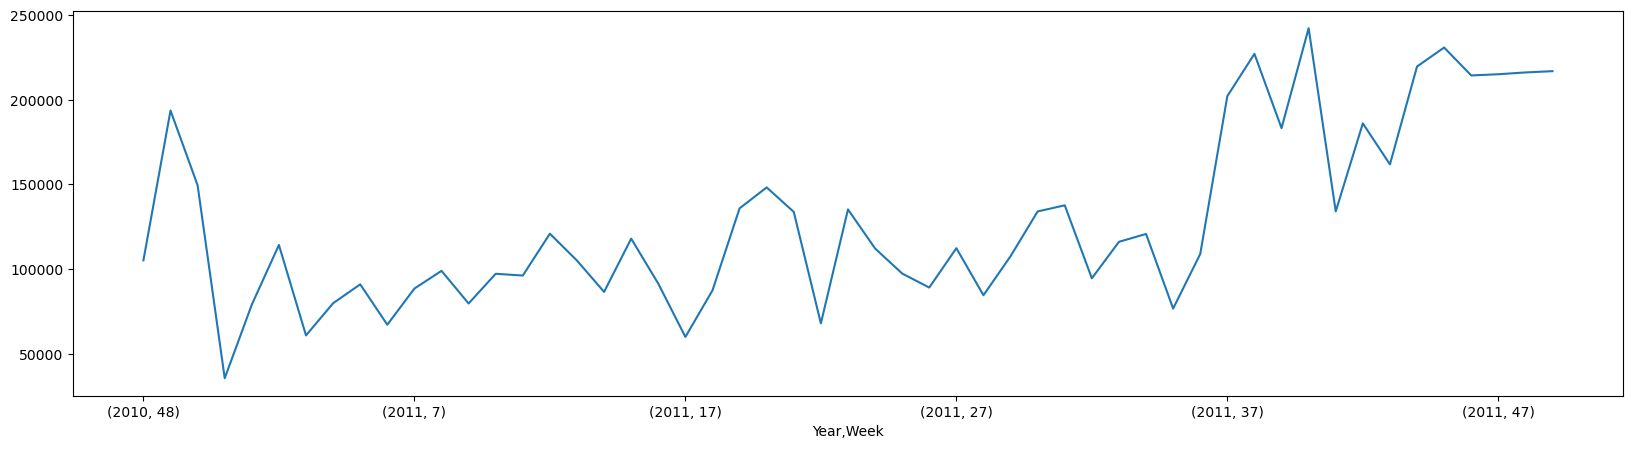

In [68]:
plt.figure(figsize=(20,5))
weekly_total_sale.plot()

In [69]:
px.line(weekly_total_sale.reset_index()['TotalSale']) #This chart is for showing the trend, so we are going to ignore the x-axis part

## What is the most popular product?

In [70]:
df_uk.head() #To check the column names again.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,Month,Year,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48


In [71]:
# Find out the products which have been sold at the most amounts of whole sales.
df_uk.groupby("StockCode")["TotalSale"].sum().sort_values(ascending=False).head(10)

StockCode
22423     103122.85
85123A     88469.30
85099B     75416.67
47566      61952.58
84879      52314.87
22502      46158.00
79321      45155.61
22086      39596.73
21137      37799.42
22197      34110.13
Name: TotalSale, dtype: float64

In [72]:
# Find out the product which has been sold at the most quantities.
df_uk.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)

StockCode
84077     47982
22197     45217
85099B    40880
84879     32679
85123A    32154
22616     24313
17003     22708
21212     22205
22178     21456
21977     19916
Name: Quantity, dtype: int64

### UK, the customer who spent the most

In [73]:
# Who is the customer who purhcased at the most amounts of total sales.
df_uk.groupby("CustomerID")["TotalSale"].sum().sort_values(ascending=False).head(5) #18102

CustomerID
18102.0    256438.49
17450.0    187482.17
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
Name: TotalSale, dtype: float64

In [74]:
px.line(df_uk[df_uk["CustomerID"]==18102].groupby("InvoiceDate")["TotalSale"].sum())

In [75]:
# Scatter Plot for most sales date
# The features for scatter plot are as follows: number of stock codes, number of customers

daily_total_sale = df_uk.groupby("DateOnly")["TotalSale"].sum().reset_index()
daily_total_sale.head()

,DateOnly,TotalSale
0,2010-12-01,42030.85
1,2010-12-02,45622.08
2,2010-12-03,17512.44
3,2010-12-05,25458.85
4,2010-12-06,29007.74


In [76]:
daily_number_stocks = df_uk.groupby("DateOnly")["StockCode"].nunique().reset_index()

In [77]:
daily_number_customers = df_uk.groupby("DateOnly")["CustomerID"].nunique().reset_index()

In [78]:
#Error happens because of the inovice date time => Fix to Daily
merged_daily = pd.merge(daily_total_sale, daily_number_stocks, on="DateOnly")
merged_daily = pd.merge(merged_daily, daily_number_customers, on="DateOnly")
merged_daily.head()

,DateOnly,TotalSale,StockCode,CustomerID
0,2010-12-01,42030.85,897,91
1,2010-12-02,45622.08,917,113
2,2010-12-03,17512.44,600,42
3,2010-12-05,25458.85,1088,70
4,2010-12-06,29007.74,903,85


In [79]:
# This shows that the correlations between the number of kinds of products and the number of customers.
# It is sure thing to show the upward trendline because the more customers buy, the more products are sold.
fig = px.scatter(merged_daily[merged_daily["TotalSale"]>0],
                 x="StockCode",y="CustomerID",size="TotalSale",
                 trendline="ols")
fig.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [80]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,Month,Year,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48


# Forecast the daily total sale based on the previous data

In this context, I am going to use Multivariate Linear Regression to predict the futnre daily total sale. But it is not that accurate to utilize the factors which are in this database. Because some of these factors are hard to be an independent variable, I cannot say that this model is correct and reasonable. This model is showing that I am available to design a multivariate linear regression model.

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold

#### Data Cleaning for Daily Total Sale forecasting

In [82]:
# Counting the number of daily customers
daily_number_customers = df_uk.groupby("DateOnly")["CustomerID"].nunique()
daily_number_customers.head()

DateOnly
2010-12-01     91
2010-12-02    113
2010-12-03     42
2010-12-05     70
2010-12-06     85
Name: CustomerID, dtype: int64

In [83]:
# Counting the number of daily stocks (Kinds of stocks)
daily_number_stocks = df_uk.groupby("DateOnly")["StockCode"].nunique()
daily_number_stocks.head()

DateOnly
2010-12-01     897
2010-12-02     917
2010-12-03     600
2010-12-05    1088
2010-12-06     903
Name: StockCode, dtype: int64

In [84]:
# Summing the daily total sale
daily_total_sale.head()

,DateOnly,TotalSale
0,2010-12-01,42030.85
1,2010-12-02,45622.08
2,2010-12-03,17512.44
3,2010-12-05,25458.85
4,2010-12-06,29007.74


In [85]:
daily_merged = pd.merge(daily_number_customers,daily_number_stocks, on="DateOnly")
daily_merged = pd.merge(daily_merged, daily_total_sale, on="DateOnly")
daily_merged.head()

,DateOnly,CustomerID,StockCode,TotalSale
0,2010-12-01,91,897,42030.85
1,2010-12-02,113,917,45622.08
2,2010-12-03,42,600,17512.44
3,2010-12-05,70,1088,25458.85
4,2010-12-06,85,903,29007.74


In [86]:
X = daily_merged[["DateOnly", "CustomerID", "StockCode"]]
X.head()

,DateOnly,CustomerID,StockCode
0,2010-12-01,91,897
1,2010-12-02,113,917
2,2010-12-03,42,600
3,2010-12-05,70,1088
4,2010-12-06,85,903


In [87]:
y = daily_merged["TotalSale"]

In [88]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [90]:
le.fit(X["DateOnly"])

LabelEncoder()

In [91]:
X["DateOnly"] = le.transform(X["DateOnly"])

/var/folders/qm/p39lnhx103n3x9q5d1n6hhv00000gn/T/ipykernel_3222/3676131491.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [93]:
X_train.head()

,DateOnly,CustomerID,StockCode
279,279,123,1221
211,211,54,693
197,197,44,622
75,75,47,596
177,177,46,671


In [94]:
reg = linear_model.LinearRegression()

In [95]:
reg.fit(X_train, y_train)

LinearRegression()

In [96]:
prediction = reg.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_log_error

In [98]:
mean_squared_log_error(y_test, prediction)

0.1108240772679264

In [99]:
y_test.head()

180    16443.37
154    28208.65
111    24374.97
247    37006.38
60      9578.89
Name: TotalSale, dtype: float64

In [100]:
prediction

array([19955.47881534, 27511.70990694, 21720.82275793, 29827.76888359,
       12183.19844404, 18680.02489598, 29060.76997692, 20334.1056234 ,
       13262.01738112, 11384.90689583, 22008.89319243, 22522.78475084,
       19636.16497248, 15955.22556454, 21858.96109523, 13596.90711755,
       28592.78444585, 16238.84106669, 27441.86449757, 11812.74564095,
       27612.28181766, 32987.91671543, 26346.35926661, 10589.03981533,
       25748.44918066, 19077.5072551 , 29710.72726719, 24747.63638109,
       20026.0364982 , 26101.78130524, 15530.30048531, 41680.95709294,
       16416.45193351,  9157.24916492,  6266.35217169, 35214.94585036,
       20476.11716575, 14587.00387247, 16978.51397272, 17500.45487293,
       19385.26017175, 13180.55417011, 28975.9478019 ,  5862.8927736 ,
       37185.77127741, 47502.32468702, 37982.87342141,  6267.82977299,
       43071.75723097, 17272.6492463 , 27928.20401142, 23619.86453745,
       18870.06782279, 23135.42081831, 44916.95799633, 30619.82230046,
      

In [101]:
import dash

In [102]:
from dash import Dash, html, dcc, callback, Output, Input

In [107]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Online Retail Analysis', style={'textAlign':'center'}),
    dcc.Graph(figure=px.line(daily_total_sale,x="DateOnly",y="TotalSale"))
])

if __name__ == '__main__':
    app.run(debug=True)